# Data Scientist Professional Case Study

### Company Background

You have been hired as a data scientist at Discount Motors, a used car dealership in the UK. The dealership is expanding and has hired a large number of junior salespeople. Although promising, these junior employees have difficulties pricing used cars that arrive at the dealership. Sales have declined 18% in recent months.

The sales team have reached out to the data science team to get help with this problem.


### Customer Question

The sales team wants to know:
- Can you predict the price that a used car should be listed at based on features of the car?



### Success Criteria

It is known that cars that are more than £1500 from the estimated price will not sell. The sales team wants to know whether you can make predictions within this range.


### Dataset

The data you will use for this analysis can be accessed here: `"data/toyota.csv"`

# Exploratory Data Analysis

In [1]:
# Import essential packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Overview 

In [2]:
data = pd.read_csv('data/toyota.csv')

In [3]:
data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [4]:
data.shape
# The dataset had 6738 rows and 9 columns

(6738, 9)

In [5]:
data.info()
# The dataset had 3 categorical columns and the remaining were all numeric columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


In [6]:
data.isnull().sum()
#Luckily, this dataset had no missing values and this will save a lot of time to do data cleaning.

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [7]:
cat_var = data.select_dtypes(include = 'object').columns

In [8]:
[ data[x].unique() for x in cat_var ]
# We may want to know how many different variations in each categorical columns(features)

[array([' GT86', ' Corolla', ' RAV4', ' Yaris', ' Auris', ' Aygo', ' C-HR',
        ' Prius', ' Avensis', ' Verso', ' Hilux', ' PROACE VERSO',
        ' Land Cruiser', ' Supra', ' Camry', ' Verso-S', ' IQ',
        ' Urban Cruiser'], dtype=object),
 array(['Manual', 'Automatic', 'Semi-Auto', 'Other'], dtype=object),
 array(['Petrol', 'Other', 'Hybrid', 'Diesel'], dtype=object)]

## Data Visualization 

## Univariate Analysis

### The number of models in the dataset

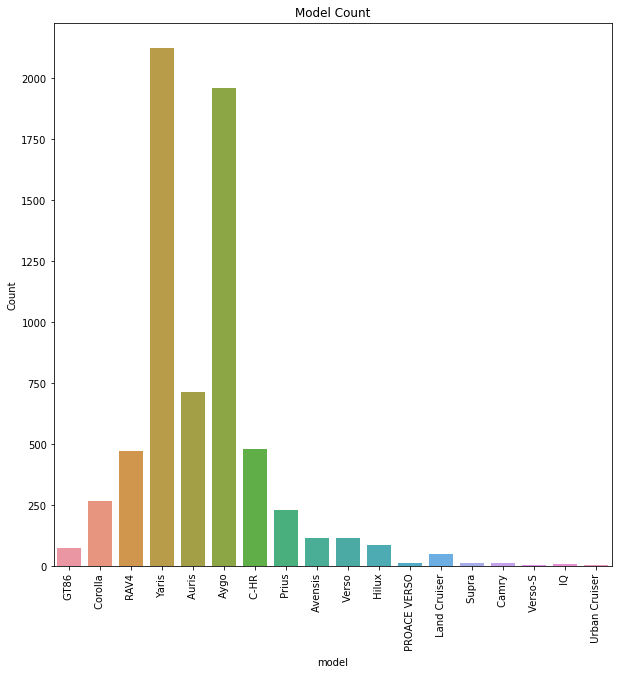

In [9]:
plt.figure(figsize = (10,10))
sns.countplot(x = 'model',data = data)
plt.xlabel('model')
plt.ylabel('Count')
plt.title('Model Count')
plt.xticks(rotation  = 90)
plt.show()
# We can see that Yaris and Aygo, these two models existed many in the dataset.

### The number of cars in the dataset group by transmission type.

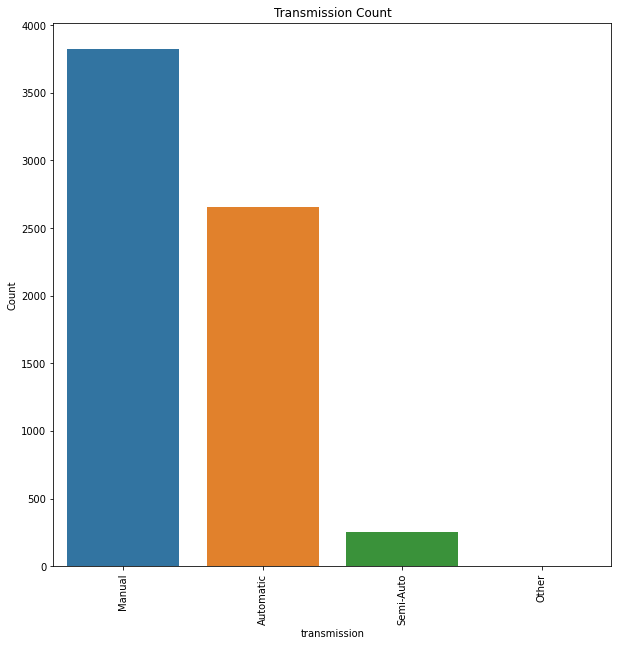

In [10]:
plt.figure(figsize = (10,10))
sns.countplot(x = 'transmission',data = data)
plt.xlabel('transmission')
plt.ylabel('Count')
plt.title('Transmission Count')
plt.xticks(rotation  = 90)
plt.show()
# When we counted the number of cars by transmission types, manual and automatic were the majority.

### The number of cars in the dataset group by fuel type.

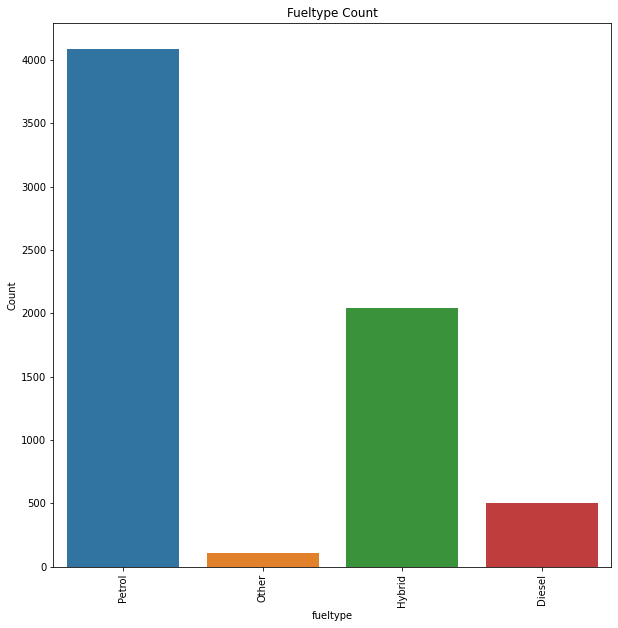

In [11]:
plt.figure(figsize = (10,10))
sns.countplot(x = 'fuelType',data = data)
plt.xlabel('fueltype')
plt.ylabel('Count')
plt.title('Fueltype Count')
plt.xticks(rotation  = 90)
plt.show()
# We can see that the most cars were with petrol, hybrid and dissel fuel types.

## Multivariate Analysis

### How cars price changed as different transmission types by each fuel type

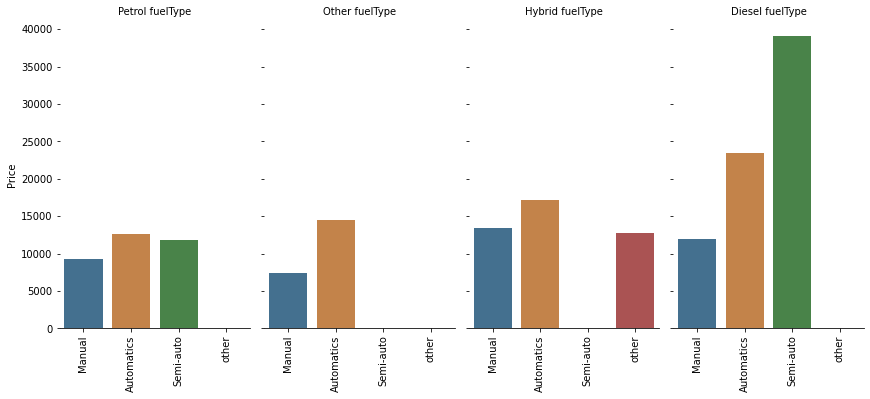

In [12]:
g = sns.catplot(x="transmission", y="price", col="fuelType",
                data=data, saturation=.5,
                kind="bar", ci=None, aspect=.6)
(g.set_axis_labels("", "Price")
  .set_xticklabels(["Manual", "Automatics", "Semi-auto","other"],rotation = 90)
  .set_titles("{col_name} {col_var}")
  .despine(left=True)) 
# We can see that cars were with diesel fuel types can sell higher price than other fuel types.

### Compare cars price by models.

In [13]:
models = list(data['model'].unique())

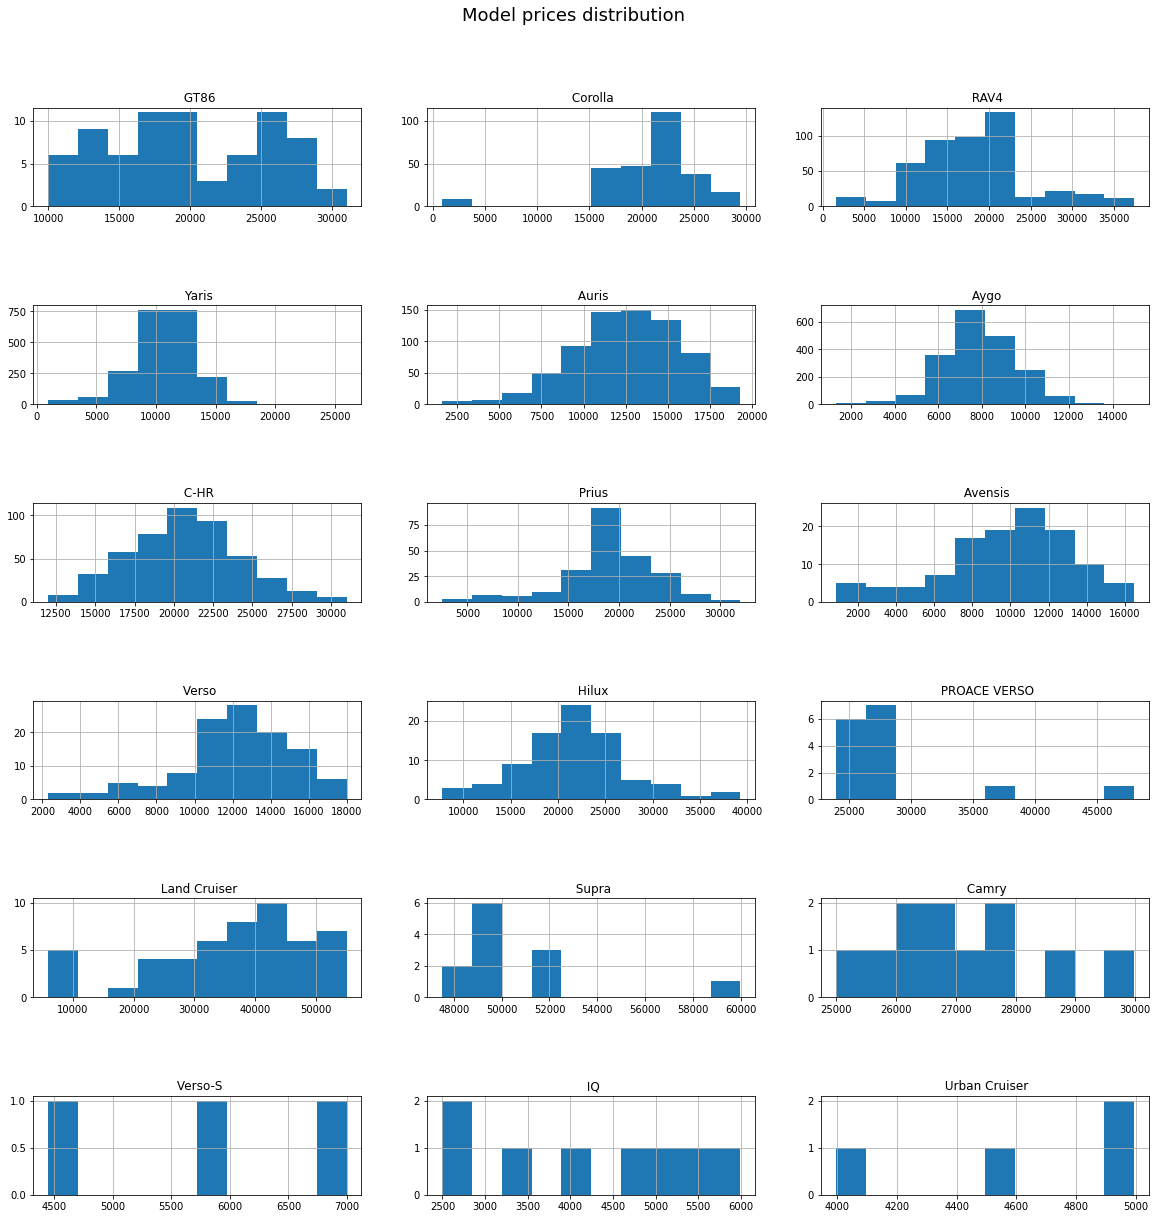

In [14]:
fig,ax = plt.subplots(6,3,figsize = (20,20))
plt.subplots_adjust(hspace=1)
fig.suptitle("Model prices distribution", fontsize=18, y=0.95)
for model,ax in zip(models,ax.ravel()):
    data[data['model'] == model]['price'].hist(ax = ax)
    ax.set_title(model)
# We can see that some cars price distribution showed normal distribution while others did not due to limited data.

### Average Price by Models

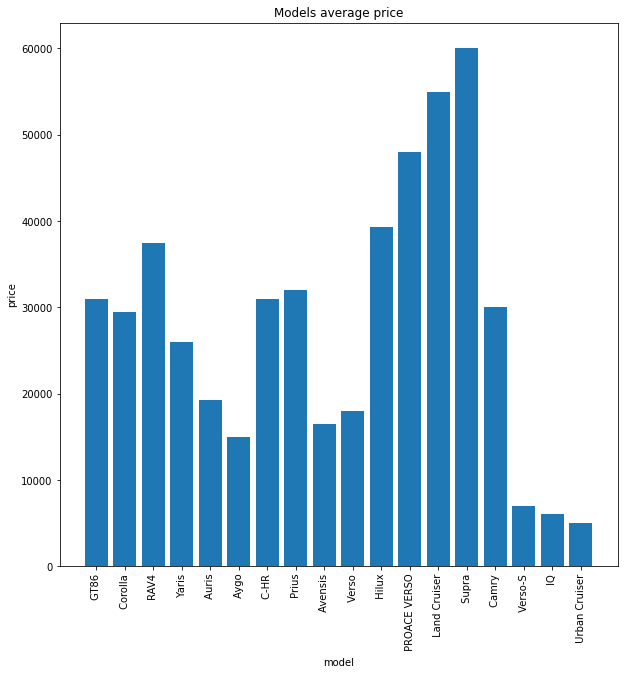

In [15]:
plt.figure(figsize = (10,10))
plt.bar(data['model'],data['price'])
plt.xticks(rotation = 90)
plt.xlabel('model')
plt.ylabel('price')
plt.title('Models average price')
plt.show()
# Supra and Land Cruiser were the first two expensive average sold price among models.

### Price Vs. Year

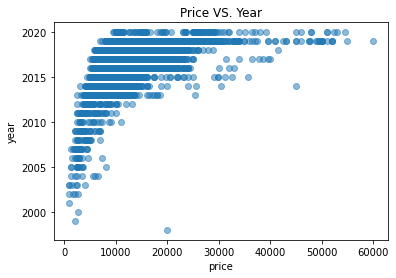

In [16]:
plt.scatter(data['price'],data['year'],alpha = 0.5)
plt.xlabel('price')
plt.ylabel('year')
plt.title('Price VS. Year')
plt.show()

### Price VS. Mileage

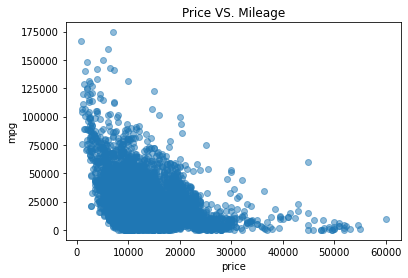

In [17]:
plt.scatter(data['price'],data['mileage'],alpha = 0.5)
plt.xlabel('price')
plt.ylabel('mpg')
plt.title('Price VS. Mileage')
plt.show()

### Price VS. MPG

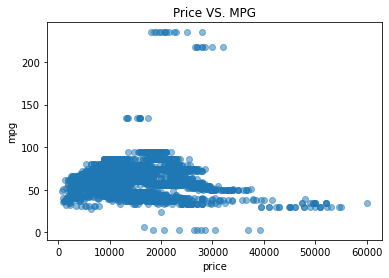

In [18]:
plt.scatter(data['price'],data['mpg'],alpha = 0.5)
plt.xlabel('price')
plt.ylabel('mpg')
plt.title('Price VS. MPG')
plt.show()

# Feature Engineering

In [19]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

## Categorical Columns Transformation
There were three categorical features we need to convert them into numeric ones so that we can bring these features in our models

### Label Encoding

The categorical column we will transform by label encoder:
"model"

In [20]:
le = LabelEncoder()
transformed_model = le.fit_transform(data['model'])
transformed_model

array([ 6,  6,  6, ..., 14, 14, 14])

In [21]:
transformed_model = pd.DataFrame(transformed_model,columns = ['encoded_model'])
transformed_model.shape

(6738, 1)

In [22]:
transformed_data = pd.concat((transformed_model,data),axis = 'columns')

In [23]:
transformed_data.head()

,encoded_model,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,6,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,6,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,6,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,6,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,6,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [24]:
transformed_data

,encoded_model,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,6,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,6,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,6,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,6,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,6,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0
...,...,...,...,...,...,...,...,...,...,...
6733,8,IQ,2011,5500,Automatic,30000,Petrol,20,58.9,1.0
6734,14,Urban Cruiser,2011,4985,Manual,36154,Petrol,125,50.4,1.3
6735,14,Urban Cruiser,2012,4995,Manual,46000,Diesel,125,57.6,1.4
6736,14,Urban Cruiser,2011,3995,Manual,60700,Petrol,125,50.4,1.3


### One-hot Encoding 

The categorical column we will transform by one-hot encoder:
"transmission", "fuelType"

In [25]:
ohe = OneHotEncoder(sparse = False,drop = 'first')
transformed_transmission = ohe.fit_transform(pd.DataFrame(data['transmission']))
trans_column_name = ohe.get_feature_names_out(['transmission'])
transformed_transmission = pd.DataFrame(transformed_transmission,columns = trans_column_name)


In [26]:
transformed_transmission.head()

,transmission_Manual,transmission_Other,transmission_Semi-Auto
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [27]:
transformed_data = pd.concat([transformed_transmission,transformed_data],axis = 'columns')
transformed_data.head()

,transmission_Manual,transmission_Other,transmission_Semi-Auto,encoded_model,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,1.0,0.0,0.0,6,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,1.0,0.0,0.0,6,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,1.0,0.0,0.0,6,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,1.0,0.0,0.0,6,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,1.0,0.0,0.0,6,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [28]:
ohe = OneHotEncoder(sparse = False,drop = 'first')
transformed_fueltype = ohe.fit_transform(pd.DataFrame(data['fuelType']))
fuel_column_name = ohe.get_feature_names_out(['fuelType'])
transformed_fuelype = pd.DataFrame(transformed_fueltype,columns = fuel_column_name)
# We selected the drop parameter as first because we want to avoid multi-colinear problem.

In [29]:
transformed_fuelype.head()

,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [30]:
transformed_data = pd.concat([transformed_fuelype,transformed_data],axis = 'columns')
transformed_data.head()

,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,transmission_Manual,transmission_Other,transmission_Semi-Auto,encoded_model,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0.0,0.0,1.0,1.0,0.0,0.0,6,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,0.0,0.0,1.0,1.0,0.0,0.0,6,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,0.0,0.0,1.0,1.0,0.0,0.0,6,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,0.0,0.0,1.0,1.0,0.0,0.0,6,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,0.0,0.0,1.0,1.0,0.0,0.0,6,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [31]:
transformed_data = transformed_data.drop(columns=['model','fuelType','transmission'],axis='columns')
transformed_data.head()

,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,transmission_Manual,transmission_Other,transmission_Semi-Auto,encoded_model,year,price,mileage,tax,mpg,engineSize
0,0.0,0.0,1.0,1.0,0.0,0.0,6,2016,16000,24089,265,36.2,2.0
1,0.0,0.0,1.0,1.0,0.0,0.0,6,2017,15995,18615,145,36.2,2.0
2,0.0,0.0,1.0,1.0,0.0,0.0,6,2015,13998,27469,265,36.2,2.0
3,0.0,0.0,1.0,1.0,0.0,0.0,6,2017,18998,14736,150,36.2,2.0
4,0.0,0.0,1.0,1.0,0.0,0.0,6,2017,17498,36284,145,36.2,2.0


In [32]:
transformed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   fuelType_Hybrid         6738 non-null   float64
 1   fuelType_Other          6738 non-null   float64
 2   fuelType_Petrol         6738 non-null   float64
 3   transmission_Manual     6738 non-null   float64
 4   transmission_Other      6738 non-null   float64
 5   transmission_Semi-Auto  6738 non-null   float64
 6   encoded_model           6738 non-null   int64  
 7   year                    6738 non-null   int64  
 8   price                   6738 non-null   int64  
 9   mileage                 6738 non-null   int64  
 10  tax                     6738 non-null   int64  
 11  mpg                     6738 non-null   float64
 12  engineSize              6738 non-null   float64
dtypes: float64(8), int64(5)
memory usage: 684.5 KB


## Interaction Terms

In [33]:
from sklearn.preprocessing import PolynomialFeatures

In [34]:
transformed_data.corr()['price'].abs().sort_values(ascending = False)

price                     1.000000
engineSize                0.727592
fuelType_Petrol           0.540698
transmission_Manual       0.536739
fuelType_Hybrid           0.484829
year                      0.420959
mileage                   0.297936
tax                       0.214498
transmission_Semi-Auto    0.070962
mpg                       0.039910
fuelType_Other            0.031705
encoded_model             0.029541
transmission_Other        0.000523
Name: price, dtype: float64

In [35]:
poly_terms = transformed_data[['engineSize','fuelType_Petrol','transmission_Manual']]

In [36]:
poly = PolynomialFeatures([2,3], interaction_only= True)
poly.feature_names_in = [poly_terms.columns]
interactions = poly.fit_transform(poly_terms)
interactions

array([[1. , 2. , 2. , 1. , 2. ],
       [1. , 2. , 2. , 1. , 2. ],
       [1. , 2. , 2. , 1. , 2. ],
       ...,
       [1. , 0. , 1.4, 0. , 0. ],
       [1. , 1.3, 1.3, 1. , 1.3],
       [1. , 1.3, 1.3, 1. , 1.3]])

In [37]:
interact_column_names = poly.get_feature_names_out()

In [38]:
interactions = pd.DataFrame(interactions,columns = interact_column_names)

In [39]:
transformed_data = pd.concat((interactions.iloc[:,1:5],transformed_data),axis = 'columns')
transformed_data.head()

,engineSize fuelType_Petrol,engineSize transmission_Manual,fuelType_Petrol transmission_Manual,engineSize fuelType_Petrol transmission_Manual,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,transmission_Manual,transmission_Other,transmission_Semi-Auto,encoded_model,year,price,mileage,tax,mpg,engineSize
0,2.0,2.0,1.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,6,2016,16000,24089,265,36.2,2.0
1,2.0,2.0,1.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,6,2017,15995,18615,145,36.2,2.0
2,2.0,2.0,1.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,6,2015,13998,27469,265,36.2,2.0
3,2.0,2.0,1.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,6,2017,18998,14736,150,36.2,2.0
4,2.0,2.0,1.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,6,2017,17498,36284,145,36.2,2.0


## Multicolinearity (Feature Selection for Linear Regression Model)

In [40]:
# load statmodels functions
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# compute the vif for all given features
def compute_vif(considered_features):
    
    X = transformed_data[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif.sort_values(by = 'VIF',ascending = False)

We will remove possible variable which caused multi-colinear problem one-by-one. Our standard of multicolinearity is the variable with 5 or higher VIF.

In [41]:
compute_vif(transformed_data.columns.drop('price'))

,Variable,VIF
2,fuelType_Petrol transmission_Manual,228.146240
7,transmission_Manual,178.260366
3,engineSize fuelType_Petrol transmission_Manual,104.211867
6,fuelType_Petrol,98.877896
1,engineSize transmission_Manual,76.315714
0,engineSize fuelType_Petrol,43.211488
4,fuelType_Hybrid,17.136541
15,engineSize,6.661161
12,mileage,2.374081
5,fuelType_Other,2.370169


In [42]:
compute_vif(transformed_data.columns.drop(['fuelType_Petrol transmission_Manual','price']))

,Variable,VIF
5,fuelType_Petrol,61.437720
6,transmission_Manual,42.020944
0,engineSize fuelType_Petrol,29.563505
1,engineSize transmission_Manual,23.217016
3,fuelType_Hybrid,15.132228
2,engineSize fuelType_Petrol transmission_Manual,13.775997
14,engineSize,5.656749
11,mileage,2.371565
10,year,2.321933
4,fuelType_Other,2.182284


In [43]:
compute_vif(transformed_data.columns.drop(['fuelType_Petrol transmission_Manual','fuelType_Petrol','price']))

,Variable,VIF
5,transmission_Manual,38.340945
1,engineSize transmission_Manual,16.580766
2,engineSize fuelType_Petrol transmission_Manual,12.739958
3,fuelType_Hybrid,11.314474
0,engineSize fuelType_Petrol,9.235403
13,engineSize,3.659217
10,mileage,2.367171
9,year,2.321860
12,mpg,2.021426
4,fuelType_Other,1.666048


In [44]:
compute_vif(transformed_data.columns.drop(['fuelType_Petrol transmission_Manual','fuelType_Petrol','transmission_Manual','price']))

,Variable,VIF
3,fuelType_Hybrid,8.128738
2,engineSize fuelType_Petrol transmission_Manual,7.329010
0,engineSize fuelType_Petrol,6.996894
1,engineSize transmission_Manual,6.076633
12,engineSize,2.818128
9,mileage,2.366841
8,year,2.307644
11,mpg,2.015578
10,tax,1.534126
4,fuelType_Other,1.354911


In [45]:
compute_vif(transformed_data.columns.drop(['fuelType_Petrol transmission_Manual','fuelType_Petrol','transmission_Manual','fuelType_Hybrid','price']))

,Variable,VIF
2,engineSize fuelType_Petrol transmission_Manual,5.723547
0,engineSize fuelType_Petrol,4.141320
1,engineSize transmission_Manual,2.970701
8,mileage,2.360717
7,year,2.306434
11,engineSize,2.098964
10,mpg,1.824305
9,tax,1.492068
5,transmission_Semi-Auto,1.299735
6,encoded_model,1.219231


In [46]:
compute_vif(transformed_data.columns.drop(['fuelType_Petrol transmission_Manual','fuelType_Petrol','transmission_Manual','fuelType_Hybrid','price',
                                          'engineSize fuelType_Petrol transmission_Manual']))

,Variable,VIF
0,engineSize fuelType_Petrol,2.613389
7,mileage,2.348535
6,year,2.291203
10,engineSize,2.032742
9,mpg,1.818988
1,engineSize transmission_Manual,1.757697
8,tax,1.477705
5,encoded_model,1.219035
4,transmission_Semi-Auto,1.160394
2,fuelType_Other,1.058941


In [47]:
data_lr = transformed_data.drop(['fuelType_Petrol transmission_Manual','fuelType_Petrol','transmission_Manual','fuelType_Hybrid',
                                          'engineSize fuelType_Petrol transmission_Manual'],axis = 'columns')

# Modeling

## Business Goal (Model Evaluation)
It is known that cars that are more than £1500 from the estimated price will not sell. The sales team wants to know whether you can make predictions within this range.
In the other words, we need to predict the price of used car with more or less 1500 errors compare to their true sold price. We can use mean absolute value to be the metric to measure how our models successfully solve this problem from business perspectives.

## Model Selection

1. Supervised Learning Algorithm or Unsupervised Learning Algorithm
AS the business goals mentioned, we predict the price of used car based on the features of the cars, and price had been provided by the data, so this is the supervised learning problem.
2. Regression or Classification Problems
After narrowing the scope, we need to figure out the proper supervised learning algorithm to solve this problem. Since the price is the continuous variable, we will use regression or regressor models to generate predictions.

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [49]:
X = data_lr.drop('price',axis = 'columns')
y = data_lr['price']

In [50]:
 X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

In [51]:
X_train.shape

(4716, 11)

In [52]:
y_train.shape

(4716,)

## Linear Regression (Baseline Model)

Advantage of linear regression:
1. Easy to understand and explain.
Disadvantage of linear regression:
1. This model can not handle the multicolinearity problem.

In [53]:
lr = LinearRegression()
scores = np.mean( cross_val_score(lr, X, y, cv=10, scoring='neg_mean_absolute_error'))
scores

-2220.502660330659

After 10 times cross validation on linear regression, we got the average mean absolute errors that exceeded significantly our prior standard(2220 VS. 1500). Obviously, linear regression can not help us to solve our problem.

## Decision Tree Regressor (Enhanced Model)

Advantage of decision tree regressor:
1. Compared to other algorithms decision trees requires less effort for data preparation during pre-processing.
Disadvantage of decision tree regressor:
1. A small change in the data can cause a large change in the structure of the decision tree causing instability.

In [56]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
X= transformed_data.drop('price',axis='columns')
y=transformed_data['price']
np.mean(cross_val_score(regressor, X, y, cv=10,scoring='neg_mean_absolute_error'))

-1384.0352322998283

## Random Forest Regressor (Ensemble Model)

Advantage of Random Forest Regressor:
1. It reduces overfitting in decision trees and helps to improve the accuracy
Disadvantage of Random Forest Regressor:
1. It requires much computational power as well as resources as it builds numerous trees to combine their outputs. 

In [57]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(random_state=0)
np.mean(cross_val_score(regr, X, y, cv=10,scoring='neg_mean_absolute_error'))

-1124.947879805661

## Summary

Due to the limited time to complete this project, we omitted several detailed steps to make predictions more accurate such as parameter tuning and feature importance explaining. Here, we only focus on the question if the model can make predictions more or less 1500 pounds than real price. Fortunately, even random forest regressor with the default parameters can help us to achieve our business goal. The following is the summarized comparison of models:

|   | model                   | Average MAE | Achieved the goal? |   |
|---|-------------------------|-------------|--------------------|---|
|   | Linear Regression       | 2220.5      | No                 |   |
|   | Decision Tree Regressor | 1384.04     | Yes                |   |
|   | Random Forest Regressor | 1124.95     | Yes                |   |

# Further Works for the Future

1. Feature Engineering
I will try more different feature engineering technique such as automatic feature engineering and then dig out more potential relations and patterns hidden in the data.
2. Model Selection
I will try more ensemble method on the dataset, compare to simple model, ensemble methods are more accurate predictions. Furthermore, I will pay more efforts to do parameter tuning using grid-search cross validation technique.
3. Model Evaluation
Except MAE metrics, I will try more different model evaluation methods to measure models performance comprehensively.
4. Business Insights
I will add more explains about feature importance to address the features contribution to models coefficients.